In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Set the random seed for reproducibility
np.random.seed(42)


In [16]:
# Dictionary containing strategy parameters
strategies = {
    'Strategy A': {
        'mean_return': 0.08,        # 8% annual return
        'volatility': 0.15,         # 15% annual volatility
        'initial_capital': 1000,  # Starting capital
        'start_date': '2024-01-01', # Start date
        'max_drawdown': 1        # 20% maximum drawdown
    },
    'Strategy B': {
        'mean_return': 0.12,        
        'volatility': 0.20,         
        'initial_capital': 1000,  
        'start_date': '2024-01-01', 
        'max_drawdown': 1        
    },
    'Strategy C': {
        'mean_return': 0.05,        
        'volatility': 0.10,         
        'initial_capital': 1000,  
        'start_date': '2024-01-01', 
        'max_drawdown': 1        
    }
}


In [17]:
# Monte Carlo Simulation Function
def monte_carlo_simulation(strategy_params, num_simulations=1000, days=252*10):
    """
    Simulate the equity values over time for a given strategy using Monte Carlo simulation.
    
    Args:
    strategy_params: dict containing strategy parameters (mean return, volatility, initial capital, max drawdown)
    num_simulations: Number of Monte Carlo simulations to run
    days: Number of trading days to simulate (default 10 years)
    
    Returns:
    Pandas DataFrame with simulated equity values.
    """
    mean_return = strategy_params['mean_return']
    volatility = strategy_params['volatility']
    initial_capital = strategy_params['initial_capital']
    max_drawdown = strategy_params['max_drawdown']
    
    # Convert annual returns and volatility to daily values
    daily_return = mean_return / 252
    daily_volatility = volatility / np.sqrt(252)
    
    # Initialize an array to store the results of all simulations
    simulations = np.zeros((num_simulations, days))
    
    for i in range(num_simulations):
        # Start with the initial capital for each simulation
        equity = initial_capital
        max_equity = initial_capital
        drawdown_exceeded = False
        
        # Store the daily equity for this simulation
        daily_equities = []
        
        for day in range(days):
            if drawdown_exceeded:
                # If the drawdown limit has been exceeded, the equity stays flat
                daily_equities.append(equity)
            else:
                # Generate a daily return (log-normal random walk)
                daily_return_sample = np.random.normal(daily_return, daily_volatility)
                equity = equity * (1 + daily_return_sample)
                daily_equities.append(equity)
                
                # Check for max drawdown
                max_equity = max(max_equity, equity)
                drawdown = (max_equity - equity) / max_equity
                if drawdown > max_drawdown:
                    drawdown_exceeded = True
        
        simulations[i, :] = daily_equities
    
    # Create a DataFrame with the results
    return pd.DataFrame(simulations.T)



In [18]:
# Run simulations for each strategy
results = {}

for strategy_name, params in strategies.items():
    results[strategy_name] = monte_carlo_simulation(params, num_simulations=1000, days=252*10)



In [19]:
# Plot the results
def plot_simulation_results(results):
    for strategy_name, data in results.items():
        plt.figure(figsize=(10, 6))
        plt.plot(data, color='grey', alpha=0.1)  # Plot each simulation
        plt.plot(data.mean(axis=1), color='blue', label='Mean Equity')
        plt.title(f'Simulated Equity Values for {strategy_name}')
        plt.xlabel('Days')
        plt.ylabel('Equity Value ($)')
        plt.legend()
        plt.show()



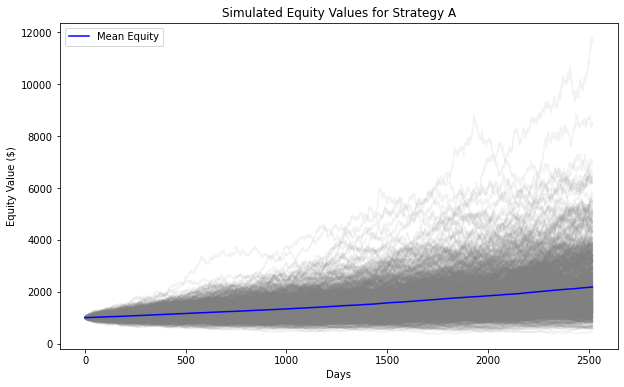

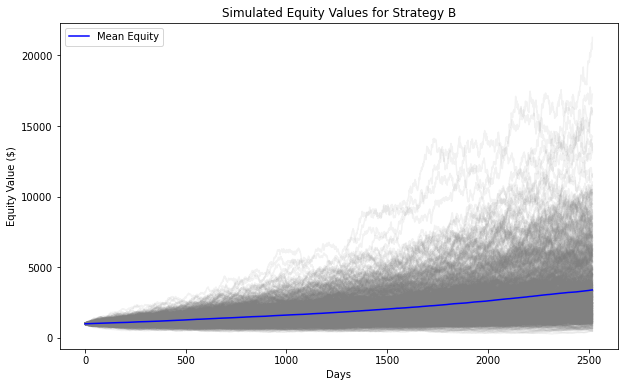

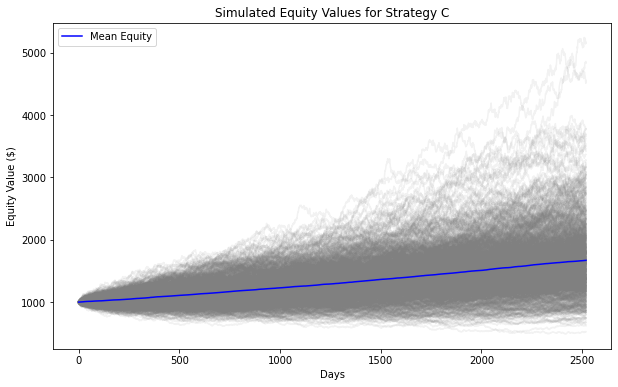

In [20]:
plot_simulation_results(results)